In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv(r"./data/cardekho_imputated.csv", index_col=[0])

In [3]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [4]:
## Data Cleaning
df.isnull().sum()   

car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [5]:
df.car_name.unique()

array(['Maruti Alto', 'Hyundai Grand', 'Hyundai i20', 'Ford Ecosport',
       'Maruti Wagon R', 'Hyundai i10', 'Hyundai Venue', 'Maruti Swift',
       'Hyundai Verna', 'Renault Duster', 'Mini Cooper', 'Maruti Ciaz',
       'Mercedes-Benz C-Class', 'Toyota Innova', 'Maruti Baleno',
       'Maruti Swift Dzire', 'Volkswagen Vento', 'Hyundai Creta',
       'Honda City', 'Mahindra Bolero', 'Toyota Fortuner', 'Renault KWID',
       'Honda Amaze', 'Hyundai Santro', 'Mahindra XUV500',
       'Mahindra KUV100', 'Maruti Ignis', 'Datsun RediGO',
       'Mahindra Scorpio', 'Mahindra Marazzo', 'Ford Aspire', 'Ford Figo',
       'Maruti Vitara', 'Tata Tiago', 'Volkswagen Polo', 'Kia Seltos',
       'Maruti Celerio', 'Datsun GO', 'BMW 5', 'Honda CR-V',
       'Ford Endeavour', 'Mahindra KUV', 'Honda Jazz', 'BMW 3', 'Audi A4',
       'Tata Tigor', 'Maruti Ertiga', 'Tata Safari', 'Mahindra Thar',
       'Tata Hexa', 'Land Rover Rover', 'Maruti Eeco', 'Audi A6',
       'Mercedes-Benz E-Class', 'Audi Q7'

In [6]:
df.car_name.value_counts()

car_name
Hyundai i20              906
Maruti Swift Dzire       890
Maruti Swift             781
Maruti Alto              778
Honda City               757
                        ... 
Mercedes-AMG C             1
Rolls-Royce Ghost          1
Maserati Quattroporte      1
Isuzu MUX                  1
Force Gurkha               1
Name: count, Length: 121, dtype: int64

In [7]:
## remove unnecessary columns
df.drop(columns=["car_name", "brand"], inplace=True)

In [8]:
df.head()

,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [9]:
## Getting All Different Types OF Features
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features))
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))

Num of Numerical Features : 7
Num of Categorical Features : 4
Num of Discrete Features : 2
Num of Continuous Features : 5


In [10]:
## independent and dependent features
X = df.drop(columns=["selling_price"])
y = df["selling_price"]

In [11]:
X

,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5
1,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5
2,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5
3,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5
4,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5
...,...,...,...,...,...,...,...,...,...,...
19537,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5
19540,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7
19541,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5
19542,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7


In [12]:
y

0         120000
1         550000
2         215000
3         226000
4         570000
          ...   
19537     250000
19540     925000
19541     425000
19542    1225000
19543    1200000
Name: selling_price, Length: 15411, dtype: int64

In [13]:
df.head()

,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [14]:
## feature encoding and scaling
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [15]:
len(df['model'].unique())

120

In [16]:
df['model'].value_counts()

model
i20             906
Swift Dzire     890
Swift           781
Alto            778
City            757
               ... 
Altroz            1
C                 1
Ghost             1
Quattroporte      1
Gurkha            1
Name: count, Length: 120, dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X['model']=le.fit_transform(X['model'])

In [18]:
X.head()

,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,7,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5
1,54,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5
2,118,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5
3,7,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5
4,38,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5


In [19]:
len(df['seller_type'].unique()),len(df['fuel_type'].unique()),len(df['transmission_type'].unique())

(3, 5, 2)

In [20]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

num_features = X.select_dtypes(exclude="object").columns
onehot_columns = ['seller_type','fuel_type','transmission_type']

In [21]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
onehot_columns = ['seller_type','fuel_type','transmission_type']

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, onehot_columns),
        ("StandardScaler", numeric_transformer, num_features)
        
    ],remainder='passthrough'
    
)

In [22]:
X = preprocessor.fit_transform(X)

In [23]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,-1.519714,0.983562,1.247335,-0.000276,-1.324259,-1.263352,-0.403022
1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.225693,-0.343933,-0.690016,-0.192071,-0.554718,-0.432571,-0.403022
2,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.536377,1.647309,0.084924,-0.647583,-0.554718,-0.479113,-0.403022
3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,-1.519714,0.983562,-0.360667,0.292211,-0.936610,-0.779312,-0.403022
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.666211,-0.012060,-0.496281,0.735736,0.022918,-0.046502,-0.403022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.508844,0.983562,-0.869744,0.026096,-0.767733,-0.757204,-0.403022
15407,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.556082,-1.339555,-0.728763,-0.527711,-0.216964,-0.220803,2.073444
15408,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.407551,-0.012060,0.220539,0.344954,0.022918,0.068225,-0.403022
15409,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.426247,-0.343933,72.541850,-0.887326,1.329794,0.917158,2.073444


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [26]:
models ={
    "Random Forest": RandomForestRegressor(),
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "KNN Regressor": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor()
}

In [27]:
##Create a Function to Evaluate Model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square


Random Forest
Model performance for Training set
- Root Mean Squared Error: 135531.3547
- Mean Absolute Error: 39709.0983
- R2 Score: 0.9774
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 225754.2609
- Mean Absolute Error: 101737.4995
- R2 Score: 0.9323


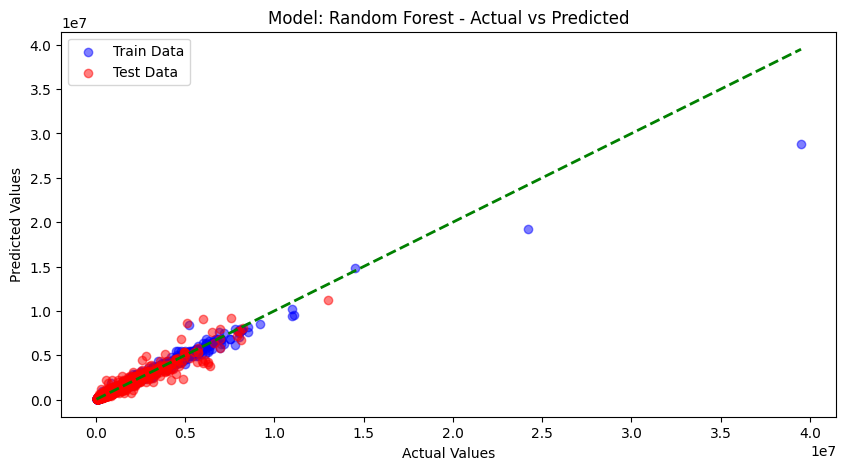



Linear Regression
Model performance for Training set
- Root Mean Squared Error: 553855.6665
- Mean Absolute Error: 268101.6071
- R2 Score: 0.6218
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 502543.5930
- Mean Absolute Error: 279618.5794
- R2 Score: 0.6645


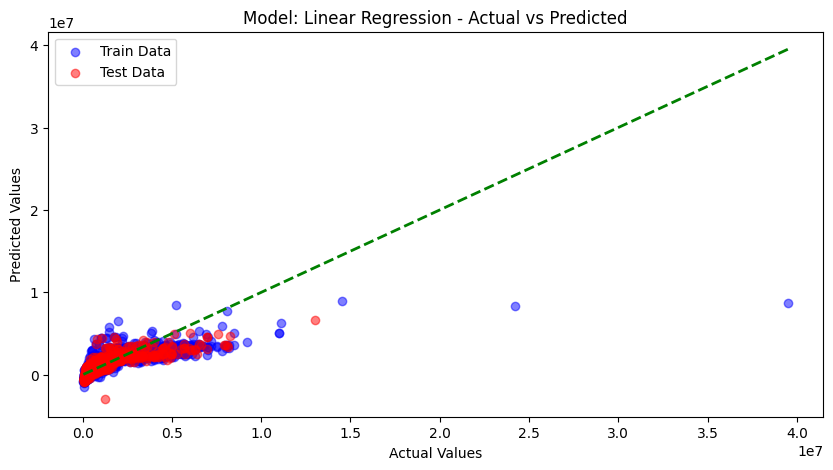



Ridge Regression
Model performance for Training set
- Root Mean Squared Error: 553856.3160
- Mean Absolute Error: 268059.8015
- R2 Score: 0.6218
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 502533.8230
- Mean Absolute Error: 279557.2169
- R2 Score: 0.6645


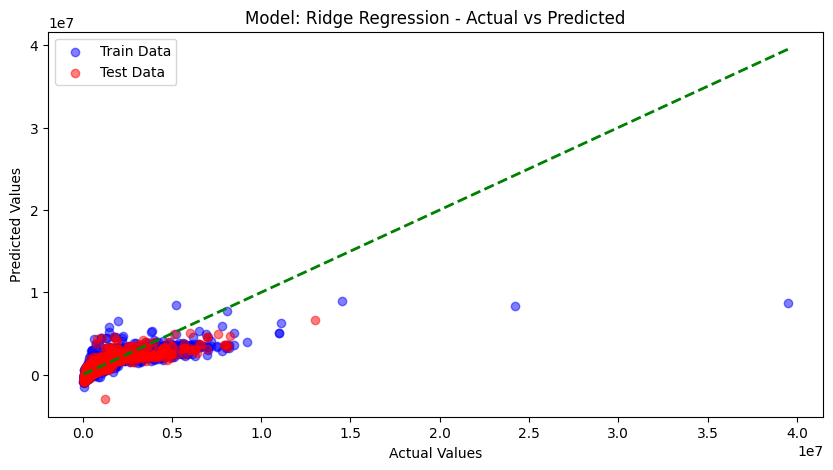



Lasso Regression
Model performance for Training set
- Root Mean Squared Error: 553855.6710
- Mean Absolute Error: 268099.2226
- R2 Score: 0.6218
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 502542.6696
- Mean Absolute Error: 279614.7461
- R2 Score: 0.6645


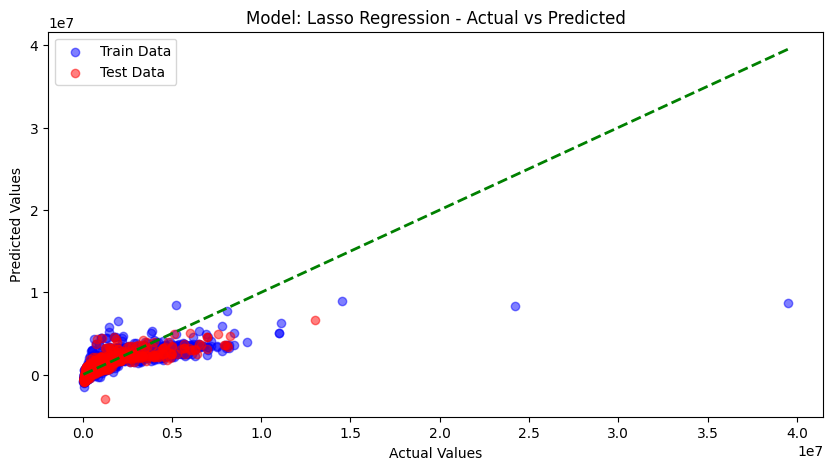



KNN Regressor
Model performance for Training set
- Root Mean Squared Error: 325873.0267
- Mean Absolute Error: 91425.6327
- R2 Score: 0.8691
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 253024.3951
- Mean Absolute Error: 112526.3461
- R2 Score: 0.9150


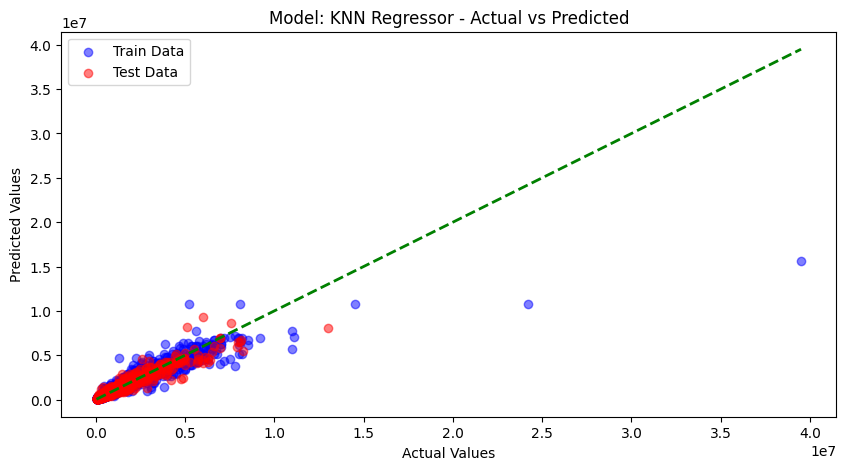



Decision Tree Regressor
Model performance for Training set
- Root Mean Squared Error: 20797.2352
- Mean Absolute Error: 5164.8199
- R2 Score: 0.9995
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 297965.4990
- Mean Absolute Error: 124993.4236
- R2 Score: 0.8821


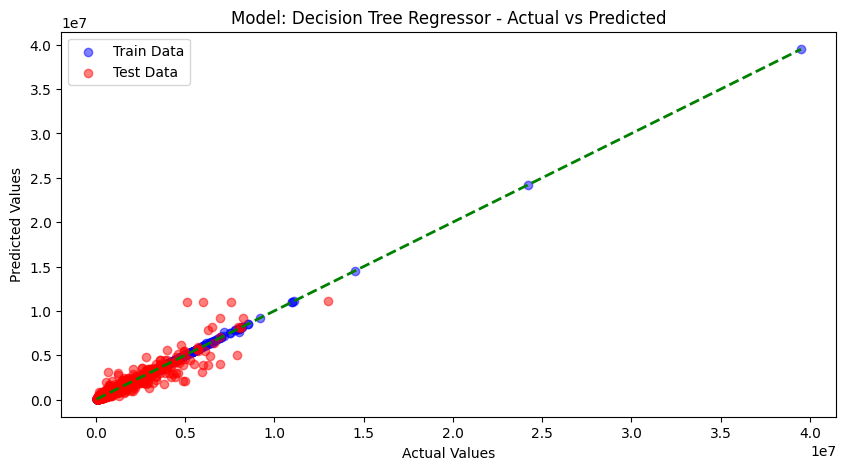

In [28]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])


    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('='*35)

        # drawing the model performance
    plt.figure(figsize=(10, 5))
    plt.scatter(y_train, y_train_pred, color='blue', label='Train Data', alpha=0.5)
    plt.scatter(y_test, y_test_pred, color='red', label='Test Data', alpha=0.5)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color='green')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Model: {list(models.keys())[i]} - Actual vs Predicted')
    plt.legend()
    plt.show()

    print('\n')